In [2]:
import numpy as np
import pandas as pd

In [3]:
data_raw = pd.read_parquet("datasets/result-1681803723540.parquet.gzip")

drop_columns = ["ebs_Q_Charge", "ebs_Q_Discharge", "BCM_ebs_I_BATT", "dcdc_OverTemperature","IC_LowBatteryvoltage", "DCDC_realInputVoltage", "DCDC_realInputCurrent"]
data_raw = data_raw.drop(columns=drop_columns)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777479 entries, 0 to 777478
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   vin                       777479 non-null  object 
 1   collect_ts                777479 non-null  int64  
 2   uuid                      777479 non-null  object 
 3   model_name                777479 non-null  object 
 4   series_code               777479 non-null  object 
 5   msg_create_time           777479 non-null  object 
 6   BCM_ebs_U_BATT            87488 non-null   float32
 7   BCM_ebs_SOC               87488 non-null   float32
 8   BCM_ebs_SOH_SUL           87488 non-null   float32
 9   BCM_ebs_SOC_STATE         87492 non-null   float32
 10  BCM_ebs_SOH_SUL_STATE     87492 non-null   float32
 11  bcm_12VBatterySOC         91097 non-null   float32
 12  dcdc_realOutputVoltage    777479 non-null  float32
 13  dcdc_realOutputCurrent    777479 non-null  f

In [4]:
data_raw.head(20)

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,BCM_ebs_U_BATT,BCM_ebs_SOC,BCM_ebs_SOH_SUL,BCM_ebs_SOC_STATE,...,DCDC_MaxPwrTime,vcu_dcdc_enable,vcu_dcdc_voltageReq,DCDC_MCU_HVIL_Warning,DCDC_BMS_HVIL_Warning,DCDC_HV_InterlockStatus1,DCDC_HV_InterlockStatus,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature
0,LM8F7D898MA008093,1681701998670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
1,LM8F7D898MA008093,1681701999670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
2,LM8F7D898MA008093,1681702000670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
3,LM8F7D898MA008093,1681702001670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
4,LM8F7D898MA008093,1681702002670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
5,LM8F7D895MAS00538,1681701994656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0
6,LM8F7D895MAS00538,1681701995656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0
7,LM8F7D895MAS00538,1681701996656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0
8,LM8F7D895MAS00538,1681701997656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0
9,LM8F7D895MAS00538,1681701998656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0


In [5]:
# 填充操作
MAS00198 = data_raw[data_raw.vin == "LM8F7D897MAS00198"].fillna(method='ffill').sort_values(by="collect_ts")
MAS00198.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 239014 to 404127
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vin                       182 non-null    object 
 1   collect_ts                182 non-null    int64  
 2   uuid                      182 non-null    object 
 3   model_name                182 non-null    object 
 4   series_code               182 non-null    object 
 5   msg_create_time           182 non-null    object 
 6   BCM_ebs_U_BATT            182 non-null    float32
 7   BCM_ebs_SOC               182 non-null    float32
 8   BCM_ebs_SOH_SUL           182 non-null    float32
 9   BCM_ebs_SOC_STATE         182 non-null    float32
 10  BCM_ebs_SOH_SUL_STATE     182 non-null    float32
 11  bcm_12VBatterySOC         182 non-null    float32
 12  dcdc_realOutputVoltage    182 non-null    float32
 13  dcdc_realOutputCurrent    182 non-null    float32
 14  DCDC_Al

In [6]:
MAS00198 = MAS00198[MAS00198["BCM_ebs_U_BATT"] > 7.]
MAS00198.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 239014 to 404127
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vin                       182 non-null    object 
 1   collect_ts                182 non-null    int64  
 2   uuid                      182 non-null    object 
 3   model_name                182 non-null    object 
 4   series_code               182 non-null    object 
 5   msg_create_time           182 non-null    object 
 6   BCM_ebs_U_BATT            182 non-null    float32
 7   BCM_ebs_SOC               182 non-null    float32
 8   BCM_ebs_SOH_SUL           182 non-null    float32
 9   BCM_ebs_SOC_STATE         182 non-null    float32
 10  BCM_ebs_SOH_SUL_STATE     182 non-null    float32
 11  bcm_12VBatterySOC         182 non-null    float32
 12  dcdc_realOutputVoltage    182 non-null    float32
 13  dcdc_realOutputCurrent    182 non-null    float32
 14  DCDC_Al

In [7]:
pd.DataFrame(MAS00198["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')


,count
BCM_ebs_U_BATT,
7.070312,1
7.245117,1
7.571289,1
7.754883,1
7.928711,1
...,...
11.574219,1
11.578125,1
11.583008,1


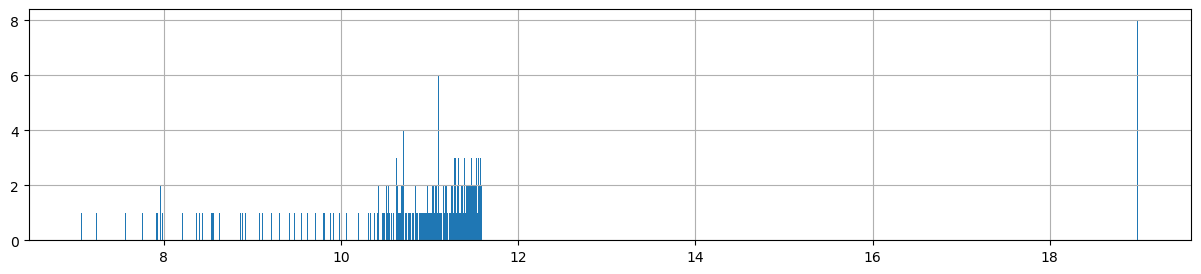

In [8]:
import matplotlib.pyplot as plt
MAS00198.BCM_ebs_U_BATT.hist(bins=1000, figsize=(15,3))
plt.show()

In [9]:
MAS00198_copy = MAS00198.copy()

MAS00198_copy['date'] = pd.to_datetime(MAS00198_copy["collect_ts"], unit='ms')

MAS00198_copy = MAS00198_copy.set_index("date")
MAS00198_copy

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,BCM_ebs_U_BATT,BCM_ebs_SOC,BCM_ebs_SOH_SUL,BCM_ebs_SOC_STATE,...,DCDC_MaxPwrTime,vcu_dcdc_enable,vcu_dcdc_voltageReq,DCDC_MCU_HVIL_Warning,DCDC_BMS_HVIL_Warning,DCDC_HV_InterlockStatus1,DCDC_HV_InterlockStatus,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature
date,,,,,,,,,,,,,,,,,,,,,
2023-04-18 02:33:19.721,LM8F7D897MAS00198,1681785199721,LM8F7D897MAS00198#1681785200349#4853,B24DRF8JP2L01,SERES-X1,1681785199821,11.587891,41.0,100.0,0.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
2023-04-18 02:33:29.721,LM8F7D897MAS00198,1681785209721,LM8F7D897MAS00198#1681785210459#2521,B24DRF8JP2L01,SERES-X1,1681785209881,11.583008,41.0,100.0,0.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
2023-04-18 02:33:39.721,LM8F7D897MAS00198,1681785219721,LM8F7D897MAS00198#1681785220370#2295,B24DRF8JP2L01,SERES-X1,1681785219782,11.578125,41.0,100.0,0.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
2023-04-18 02:33:49.721,LM8F7D897MAS00198,1681785229721,LM8F7D897MAS00198#1681785230322#1195,B24DRF8JP2L01,SERES-X1,1681785229781,11.574219,40.0,100.0,0.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
2023-04-18 02:33:59.721,LM8F7D897MAS00198,1681785239721,LM8F7D897MAS00198#1681785240386#2988,B24DRF8JP2L01,SERES-X1,1681785239782,11.569336,40.0,100.0,0.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18 04:21:10.140,LM8F7D897MAS00198,1681791670140,LM8F7D897MAS00198#1681791672183#9826,B24DRF8JP2L01,SERES-X1,1681791671644,9.304688,0.0,100.0,0.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
2023-04-18 04:21:20.140,LM8F7D897MAS00198,1681791680140,LM8F7D897MAS00198#1681791682256#4846,B24DRF8JP2L01,SERES-X1,1681791681675,8.541016,0.0,100.0,0.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
2023-04-18 04:21:30.140,LM8F7D897MAS00198,1681791690140,LM8F7D897MAS00198#1681791692164#2511,B24DRF8JP2L01,SERES-X1,1681791691635,18.999023,255.0,255.0,3.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0


In [10]:
MAS00198_copy.loc[:, ["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]]

,BCM_ebs_U_BATT,dcdc_realOutputVoltage
date,,
2023-04-18 02:33:19.721,11.587891,0.0
2023-04-18 02:33:29.721,11.583008,0.0
2023-04-18 02:33:39.721,11.578125,0.0
2023-04-18 02:33:49.721,11.574219,0.0
2023-04-18 02:33:59.721,11.569336,0.0
...,...,...
2023-04-18 04:21:10.140,9.304688,0.0
2023-04-18 04:21:20.140,8.541016,0.0
2023-04-18 04:21:30.140,18.999023,0.0


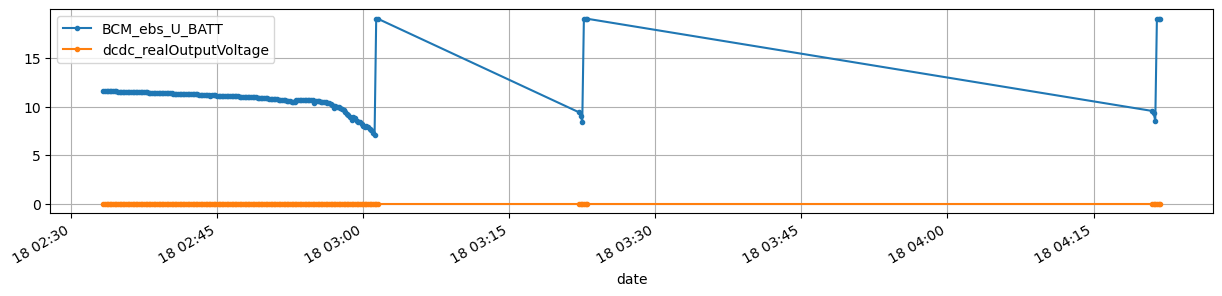

In [11]:
import matplotlib.pyplot as plt

MAS00198_copy[["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()

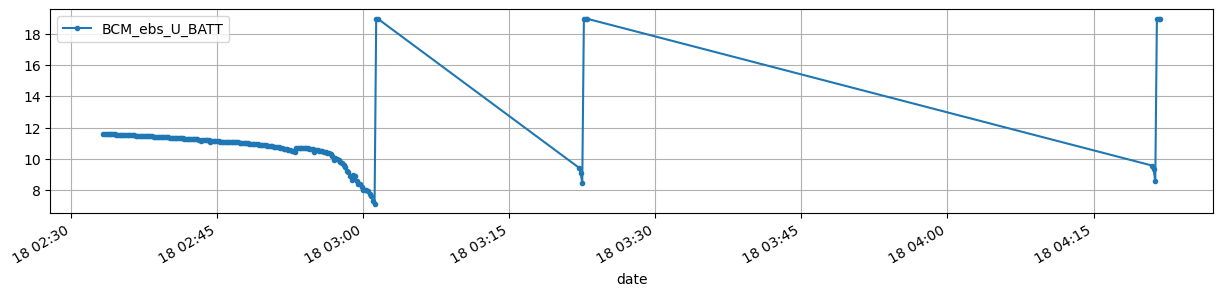

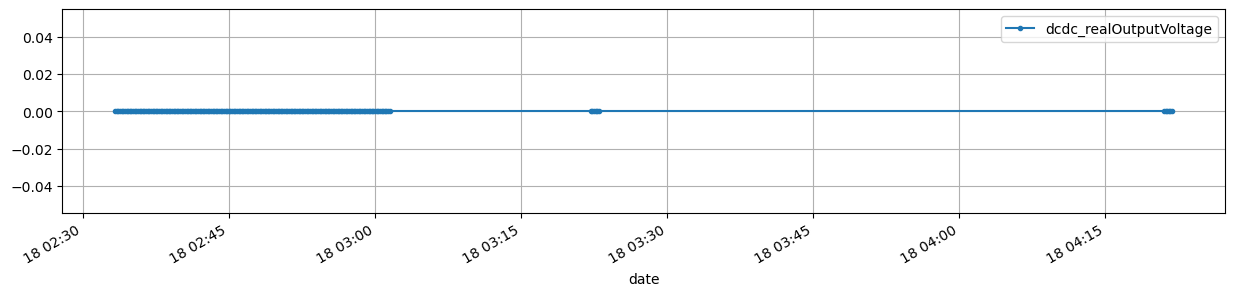

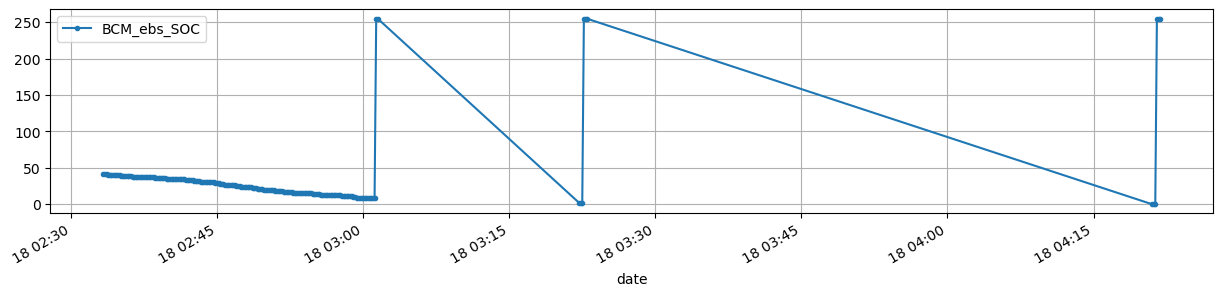

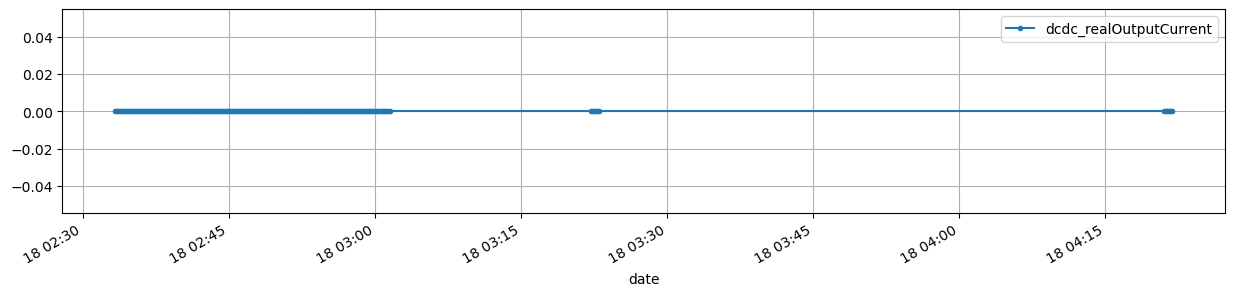

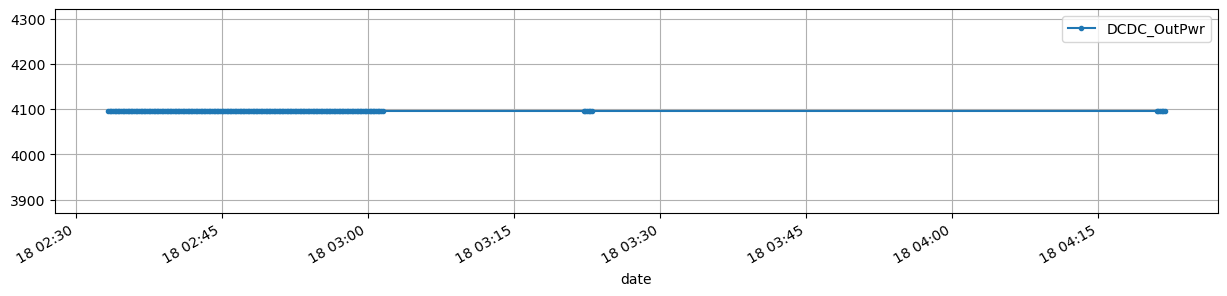

In [12]:
import matplotlib.pyplot as plt

MAS00198_copy[["BCM_ebs_U_BATT"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00198_copy[["dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00198_copy[["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00198_copy[["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
MAS00198_copy[["DCDC_OutPwr"]].plot(grid=True, marker=".", figsize=(15, 3))
# extra code – saves the figure for the book
plt.show()